# Project 7 - Machine Learning  
Womenker Karto - October 7th, 2024  
GitHub Repository Link - https://github.com/wkarto/datafun-07-applied

## Import Dependencies

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

## Part 1 - Chart a Straight Line

Create a lambda and use it to calculae Celsius equivalents of Fahrenheit temperatures.

In [463]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

Place the data in a dataframe using Pandas then use plot method to display the Fahrenheit and Celsius temperatures.

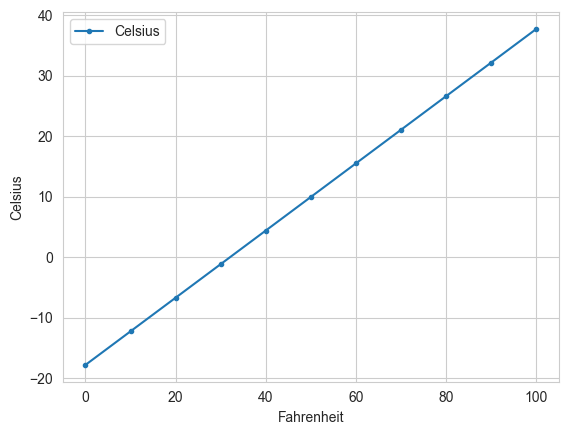

In [464]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Predict January Average High Temperatures  

### Data Acquisition

Load the data into the datafame.

In [465]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

Inspect the head and tail.

In [466]:
nyc.head()
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Step 3 - Data Cleaning

Rename "Value" column as "Temperature".

In [467]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


Check the column type.

In [468]:
nyc.Date.dtype

dtype('int64')

Divide by 100 to truncate the last two digits.

In [469]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


### Step 4 - Descriptive Statistics

Get basic descriptive statistics by calling describe on the Temperature column.

In [470]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

Use stats from scipy and use linregress to calculate a slope and intercept.

In [471]:
linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)
linear_regression.slope


np.float64(0.014771361132966163)

Now the intercept

In [472]:
linear_regression.intercept

np.float64(8.694993233674289)

## Part 2 - Prediction

### Section 6 - Predict

Now predict the average January temperature in 2024.

In [473]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

Now we can predict the average temperature of 1890 (years before the file starts).

In [474]:
linear_regression.slope * 1890 + linear_regression.intercept

np.float64(36.612865774980335)

### Section 7 - Visualizations

Plotting the average high temperatures and a regression line

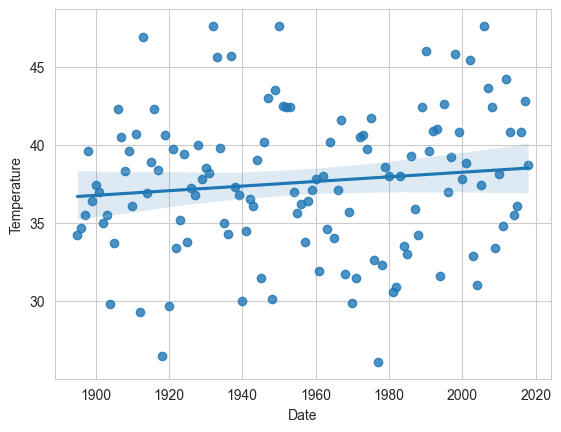

In [475]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

Scale the y axis for a better data visualizaion.

(10.0, 70.0)

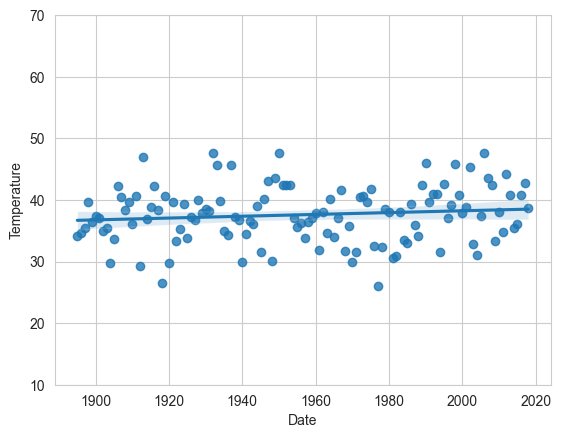

In [476]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 3 - Prediction - Predict Avg High Temp in NYC in January

### Section 1 - Build the Model

Split the data into training and testing sets. 

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

Check the shape of the model.

In [478]:
 X_train.shape

(93, 1)

In [479]:
X_test.shape

(31, 1)

Train the model.

In [480]:
# Assuming X_train and y_train are already defined
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

# Print the LinearRegression object
print(linear_regression)

# Optionally print specific attributes
print("Coefficients:", linear_regression.coef_)
print("Intercept:", linear_regression.intercept_)


LinearRegression()
Coefficients: [0.01939167]
Intercept: -0.30779820252656975


### Section 2 - Testing the Model

In [481]:
linear_regression.coef_

array([0.01939167])

In [482]:
linear_regression.intercept_

np.float64(-0.30779820252656975)

In [483]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
     print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict

Predict the temp for January 2024.

In [484]:
predict = (lambda x: linear_regression.coef_ * x +
           linear_regression.intercept_)
predict(2024)

array([38.94094855])

Predict January temperature for 1890.

In [485]:
predict(1890)

array([36.34246432])

Predict for 2080

In [490]:
predict(2080)

array([40.02688225])

### Section 4 - Visualizations

(10.0, 70.0)

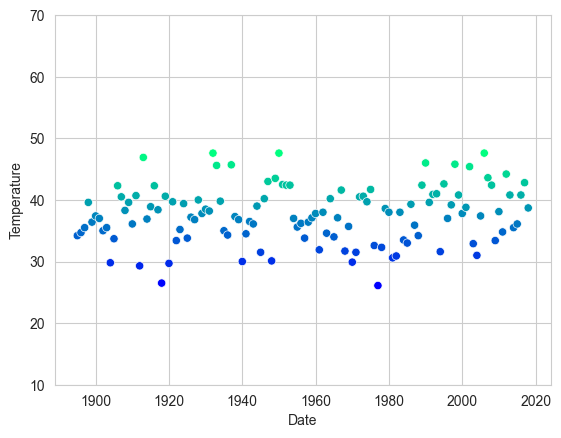

In [486]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
                       hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

In [487]:
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [488]:
y = predict(x)

(10.0, 70.0)

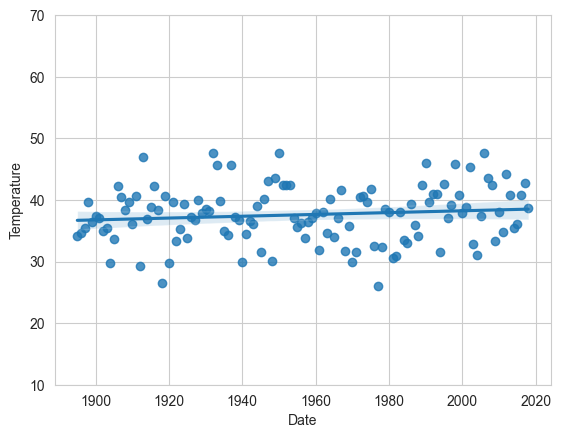

In [489]:
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

## Part 4 - Insights

The first method of Time Series and Simple Linear Regression using coefficients to make predictions showed a 2024 temperature of 38.59.  

The second method of Time Series and Simple Linear Regression  using actual calculations to make predictions showed a 2024 temperataure of 38.94.  

Both models indicate a slowly rising average temperature over the studied time period.

Interestingly, if we predict out to 2080 when college students will be around 75 years old, the average temperature will have risen to over 40 degrees which means there will have been an increase in temperature of around 4 degrees since 1890.